Importo la libreria pandas para trabajar con data sets

In [22]:
import pandas as pd
import numpy as np

Cargo el .csv, le indico el separador de columnas y le fuerzo un schema para que reconozca el campo como texto (por defecto es objeto)

In [2]:
dtype_schema = {'positiva_alcohol':'str'}
df = pd.read_csv('AccidentesBicicletas_2023.csv', delimiter=';')

Calculo el numero de registros totales (cuidado con los nulos) 

In [3]:
total_registros = len(df)
print("El numero total de registros es: ", total_registros)

El numero total de registros es:  905


Calculo el numero de registros en los que la columna 'positiva_alcohol' es S    -----     S / N 

In [6]:
conteo = (df['positiva_alcohol'] == 'S').sum()

print("Numero de accidentes que ocurrieron en el barrio:", conteo)

Numero de accidentes que ocurrieron en el barrio: 21


Calculo el porcentaje de accidentes del año 2023 en los que el conductor dio positivo en alcohol

In [7]:
porcentaje_alcohol = (conteo/total_registros)*100
print("El porcentaje de accientes donde el conductor dio positivo en alcohol es: ", porcentaje_alcohol)
print(f"Porcentaje de accidentes con alcohol: {porcentaje_alcohol:.2f}%")

El porcentaje de accientes donde el conductor dio positivo en alcohol es:  2.3204419889502765
Porcentaje de accidentes con alcohol: 2.32%


Ahora vamos a mostrar en una grafica el número de accidentes que ocurrieron en cada fecha

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import make_interp_spline

Pasamos la columna fecha a formato DATE y creamos un nuevo data frame 'accidentes_por_fecha' con dos columnas: fecha y numero de accidentes

In [20]:
# Convertir la columna 'fecha' a tipo datetime especificando el formato
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

# Agrupar por fecha y contar el número de accidentes
accidentes_por_fecha = df.groupby('fecha').size().reset_index(name='numero_de_accidentes')

Ahora mostramos los registros en los que ha habido mayor numero de accidentes

In [ ]:
max_accidentes = accidentes_por_fecha.max()
print(max_accidentes)
# No podemos usar la funcion de agregacion porque hay mas de una fecha en la que ha habido 9 accidentes 

# Ordenar el DataFrame por la columna 'numero_de_accidentes'
accidentes_fecha = accidentes_por_fecha.sort_values(by='numero_de_accidentes', ascending=False).head(5)

print(accidentes_fecha)

Hacemos la transformacion de las fechas para mostrar

In [ ]:
# Convertir las fechas a valores numéricos para la interpolación
x = accidentes_por_fecha['fecha'].map(pd.Timestamp.toordinal)
y = accidentes_por_fecha['numero_de_accidentes']

In [23]:
# Crear una función de interpolación spline
xnew = np.linspace(x.min(), x.max(), 300)  # Crear nuevos puntos para suavizar
spl = make_interp_spline(x, y, k=3)  # Tipo de spline cúbico
y_smooth = spl(xnew)

# Convertir los valores numéricos de vuelta a fechas
fechas_suavizadas = [pd.Timestamp.fromordinal(int(xi)) for xi in xnew]

Mostramos los datos

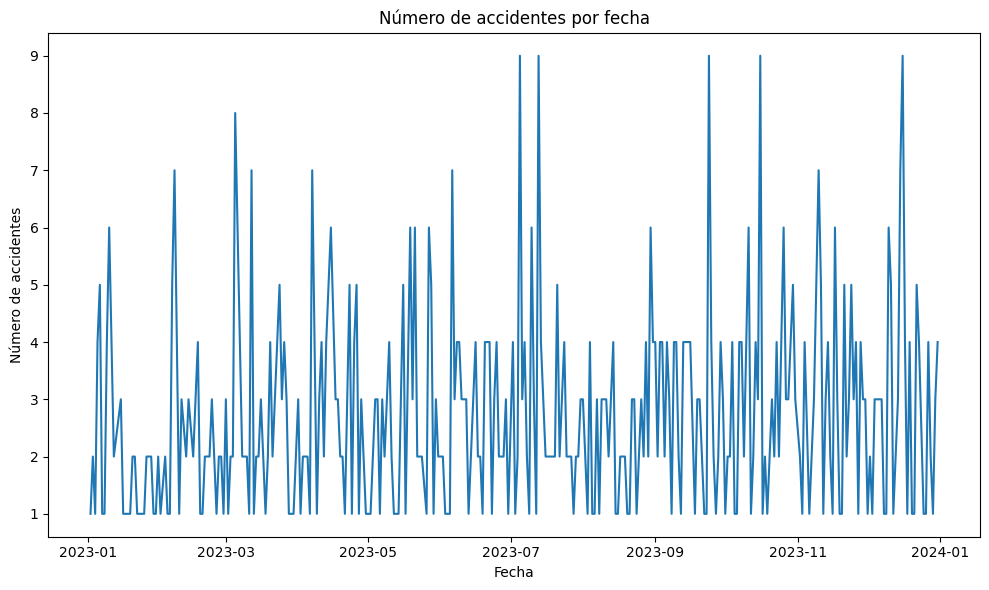

In [40]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(accidentes_por_fecha['fecha'], accidentes_por_fecha['numero_de_accidentes'])

# Añadir títulos y etiquetas
plt.title('Número de accidentes por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de accidentes')

# Rotar las etiquetas del eje x si es necesario
#plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Vemos que la grafica de arriba muestra mejor los datos porque al suavizar la linea no llegamos a mostrar las 5 fechas en las que hubo 9 accidentes

Text(0, 0.5, 'Número de accidentes')

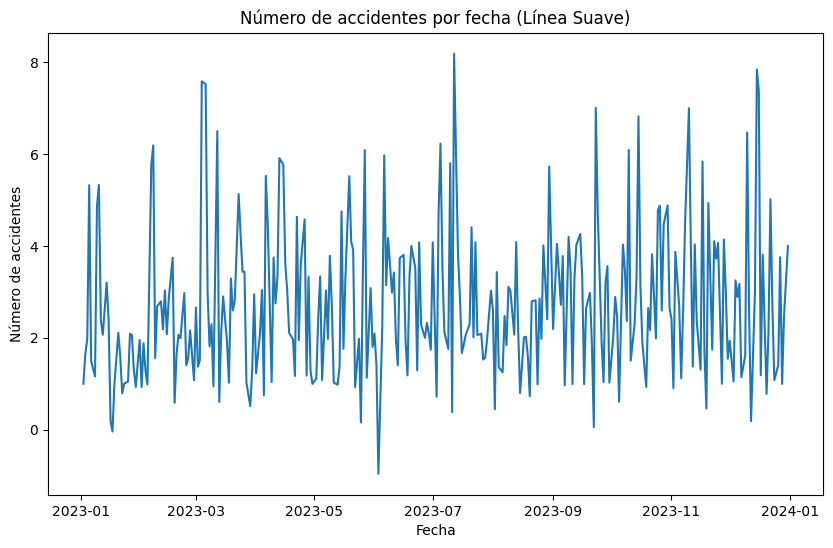

In [41]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(fechas_suavizadas, y_smooth)

# Añadir títulos y etiquetas
plt.title('Número de accidentes por fecha (Línea Suave)')
plt.xlabel('Fecha')
plt.ylabel('Número de accidentes')